### Accuracy of different algorithms

* Preprocessing might be useful in some situations to reduce the overfitting, however in this particular case it doesn't.
* Depth doesn't influence positevely on the overfitting reduce or eneral accuracy.
* Adding a well like one more feature (converting str (i.e. 'SHANKLE') to int (i.e. 3) didn't help to reduce the overfitting

In [5]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import sklearn.svm
%matplotlib inline

# import file
data = pd.read_csv('facies_vectors.csv')

# change well names to integers
# print(list(set(data['Well Name'])))

# data_wn = data.replace({'SHRIMPLIN': 1, 'ALEXANDER D': 2, 'SHANKLE': 3, 'LUKE G U': 4, 
#                         'KIMZEY A': 5, 'CROSS H CATTLE': 6, 'NOLAN': 7, 'Recruit F9': 8, 
#                         'NEWBY': 9, 'CHURCHMAN BIBLE': 10}, regex=True)
# print(print(list(set(data_wn['Well Name']))))
        

# fill NaN with the mean value
data.fillna(data['PE'].mean(), inplace=True)

# create a raining wells set of data (without test well)
training_wells = data[data['Well Name'] != 'SHANKLE']

# create a test well set of data
test_well = data[data['Well Name'] == 'SHANKLE']

# unique training well names
well_names = list(training_wells['Well Name'].unique())

# create a list of features from training wells (without Facies)
X_train = np.array(training_wells.drop(['Facies', 'Formation', 'Well Name',
                                        'Depth', 'NM_M', 'RELPOS'], 1))
#X_train = preprocessing.scale(X_train)

# create a label from training wells (Facies)
y_train = np.array(training_wells['Facies'])

# create a list of features from test well (without Facies)
X_test = np.array(test_well.drop(['Facies', 'Formation', 'Well Name',
                                  'Depth', 'NM_M', 'RELPOS'], 1))
#X_test = preprocessing.scale(X_test)

# create a label from test well (Facies)
y_test = np.array(test_well['Facies'])

models = []
models.append(('Lin_Reg', LinearRegression()))
models.append(('Log_Reg', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('BR', BayesianRidge()))
names = []
results = []


for name, model in models:
    model.fit(X_train, y_train)
    names.append(name)
    results.append(model.score(X_test, y_test))

for i in range(len(names)):
    print("%s: %s" % (names[i], results[i]))

Lin_Reg: 0.491938720496
Log_Reg: 0.412026726058
DTC: 0.358574610245
KNC: 0.398663697105
LDA: 0.516703786192
GNB: 0.556792873051
BR: 0.491023182681


### Let's count the number of each facies in the test well SHANKLE:

In [6]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

# 1=sandstone  2=c_siltstone   3=f_siltstone  # 4=marine_silt_shale 
# 5=mudstone 6=wackestone 7=dolomite 8=packstone 9=bafflestone
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

facies_titles = ['sandstone', 'c_siltstone', 'f_siltstone', 'marine_silt_shale',
                'mudstone', 'wackestone', 'dolomite', 'packstone', 'bafflestone']

facies_color_map = dict(zip(facies_labels, facies_colors))

d = {}

for i in y_test:
    d[i] = d.get(i, 0) + 1
    
print(d)

{1: 89, 2: 89, 3: 117, 4: 7, 5: 19, 6: 71, 7: 17, 8: 40}


### Confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix
from classification_utilities import display_cm, display_adj_cm

clf = svm.SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
predicted_clf = clf.predict(X_test)

cm = confusion_matrix(y_test, predicted_clf)

display_cm(cm, facies_labels, hide_zeros=True)

0.443207126949
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    18    47    11     3           1           9          89
     CSiS     7    54    20     4           3           1          89
     FSiS     5    29    77     2     2                 2         117
     SiSh           5                       2                       7
       MS           3     5                 1     2     8          19
       WS           6     6     1     4    31          23          71
        D     1     1     7                       2     6          17
       PS           1     7           1     8     5    17     1    40
       BS                                                           0


However, let's check confusion matrix with other algorithms:

In [208]:
prediction_Log_Reg = Log_Reg.predict(X_test)
prediction_DTC = DTC.predict(X_test)
prediction_KNC = KNC.predict(X_test)
prediction_LDA = LDA.predict(X_test)

print(confusion_matrix(y_test, prediction_Log_Reg))
print("-" * 30)
print(confusion_matrix(y_test, prediction_DTC))
print("-" * 30)
print(confusion_matrix(y_test, prediction_KNC))
print("-" * 30)
print(confusion_matrix(y_test, prediction_LDA))

[[ 0 85  1  0  0  3  0  0]
 [ 0 80  6  0  0  2  0  1]
 [ 0 51 57  0  0  4  0  5]
 [ 0  1  0  0  0  6  0  0]
 [ 0  2  0  6  0  8  0  3]
 [ 0 13  1  2  0 22  0 33]
 [ 0  9  7  0  0  0  0  1]
 [ 0  2  0  1  0 11  0 26]]
------------------------------
[[ 4 55 11  9  3  4  0  2  1]
 [17 31 20  7  2  7  1  4  0]
 [ 4 39 52  5  7  3  3  4  0]
 [ 0  0  0  0  0  6  0  1  0]
 [ 0  0  0 11  0  2  0  5  1]
 [ 0  2  2  3 10 40  1 13  0]
 [ 2  0  0  1  3  1  4  6  0]
 [ 0  1  0  1  3  7  1 23  4]
 [ 0  0  0  0  0  0  0  0  0]]
------------------------------
[[32 42  7  4  1  0  0  3  0]
 [13 47 20  4  0  3  0  1  1]
 [ 6 48 52  2  5  1  2  1  0]
 [ 0  5  0  0  0  2  0  0  0]
 [ 0  3  0  6  1  0  2  7  0]
 [ 1  5  2  2  7 31  3 18  2]
 [ 2  0  1  0  0  1  3  9  1]
 [ 0  1  0  2  2 12  6 13  4]
 [ 0  0  0  0  0  0  0  0  0]]
------------------------------
[[31 55  1  0  0  2  0  0  0]
 [ 1 76  6  0  0  5  0  1  0]
 [ 0 49 59  0  0  5  0  4  0]
 [ 0  0  1  0  0  5  0  1  0]
 [ 0  3  0  9  0  5  0  2  0

In [ ]:
# describe the main statistical distribution of the input variables
training_wells.describe()

training_wells.groupby('Facies').size()

training_wells.plot(kind='box', subplots=True, layout=(3, 3), figsize=(7, 7), 
                    fontsize=8, sharex=False, sharey=False)
plt.show()

training_wells.hist(figsize=(7, 7))
plt.show()

scatter_matrix(training_wells)
plt.show()

In [ ]:
# ALL TRAINING WELLS
fig = plt.figure(figsize=(20, 10)) 

# (1, 5, 1) stands for (from, to, where)
ax1 = fig.add_subplot(1, 5, 1)
ax1.scatter(data['GR'], data['Depth'], color='r', alpha=0.5)
ax1.set_ylabel('Depth', fontsize = '14' )
ax1.set_xlabel('GR', fontsize = '14')
plt.gca().invert_yaxis()

ax2 = fig.add_subplot(1, 5, 2)
ax2.scatter(data['ILD_log10'], data['Depth'], color = 'g', alpha=0.5)
ax2.set_xlabel('ILD_log10', fontsize = '14')
plt.gca().invert_yaxis()

ax3 = fig.add_subplot(1, 5, 3)
ax3.scatter(data['DeltaPHI'], data['Depth'], color = 'r', alpha=0.5)
ax3.set_xlabel('DeltaPHI', fontsize = '14')
plt.gca().invert_yaxis()

ax4 = fig.add_subplot(1, 5, 4)
ax4.scatter(data['PHIND'], data['Depth'], color = 'k', alpha=0.5)
ax4.set_xlabel('PHIND', fontsize = '14')
plt.gca().invert_yaxis()

ax4 = fig.add_subplot(1, 5, 5)
ax4.scatter(data['PE'], data['Depth'], color = 'k', alpha=0.5)
ax4.set_xlabel('PE', fontsize = '14')
plt.gca().invert_yaxis()


plt.show()

In [ ]:
# Looking for GR extremums
num = 0
for i in training_wells['GR']:
    if i >= 150:
        print(i, facies_titles[data['Facies'][num]])
    num += 1
    
    

#num = 0
#for i in training_wells['GR']:
#    if i >= 150:
#        print('GR %d  -->  %d m  -->  %s' % (i, training_wells['Depth'][num], facies_titles[training_wells['Facies'][num]]))
#    num += 1

In [ ]:
# SHRIMPLIN WELL
SW = data[data['Well Name'] == 'SHRIMPLIN']

fig = plt.figure(figsize=(20, 10)) 

# (1, 5, 1) stands for (from, to, where)
ax1 = fig.add_subplot(1, 5, 1)
ax1.scatter(SW['GR'], SW['Depth'], color='r', alpha=0.5)
ax1.set_ylabel('Depth', fontsize = '14' )
ax1.set_xlabel('GR', fontsize = '14')
plt.gca().invert_yaxis()

ax2 = fig.add_subplot(1, 5, 2)
ax2.scatter(SW['ILD_log10'], SW['Depth'], color = 'g', alpha=0.5)
ax2.set_xlabel('ILD_log10', fontsize = '14')
plt.gca().invert_yaxis()

ax3 = fig.add_subplot(1, 5, 3)
ax3.scatter(SW['DeltaPHI'], SW['Depth'], color = 'r', alpha=0.5)
ax3.set_xlabel('DeltaPHI', fontsize = '14')
plt.gca().invert_yaxis()

ax4 = fig.add_subplot(1, 5, 4)
ax4.scatter(SW['PHIND'], SW['Depth'], color = 'k', alpha=0.5)
ax4.set_xlabel('PHIND', fontsize = '14')
plt.gca().invert_yaxis()

ax4 = fig.add_subplot(1, 5, 5)
ax4.scatter(SW['PE'], SW['Depth'], color = 'k', alpha=0.5)
ax4.set_xlabel('PE', fontsize = '14')
plt.gca().invert_yaxis()


plt.show()

In [ ]:
# SHRIMPLIN WELL: looking for the GR extremums, its Depth and Facies
num = 0
for i in SW['GR']:
    if i >= 150:
        print('GR %d --> %d m --> %s' % (i, float(SW['Depth'][num]), facies_titles[SW['Facies'][num]]))
    num += 1

In [48]:
def compare_facies_plot(logs, compare, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compare].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compare)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


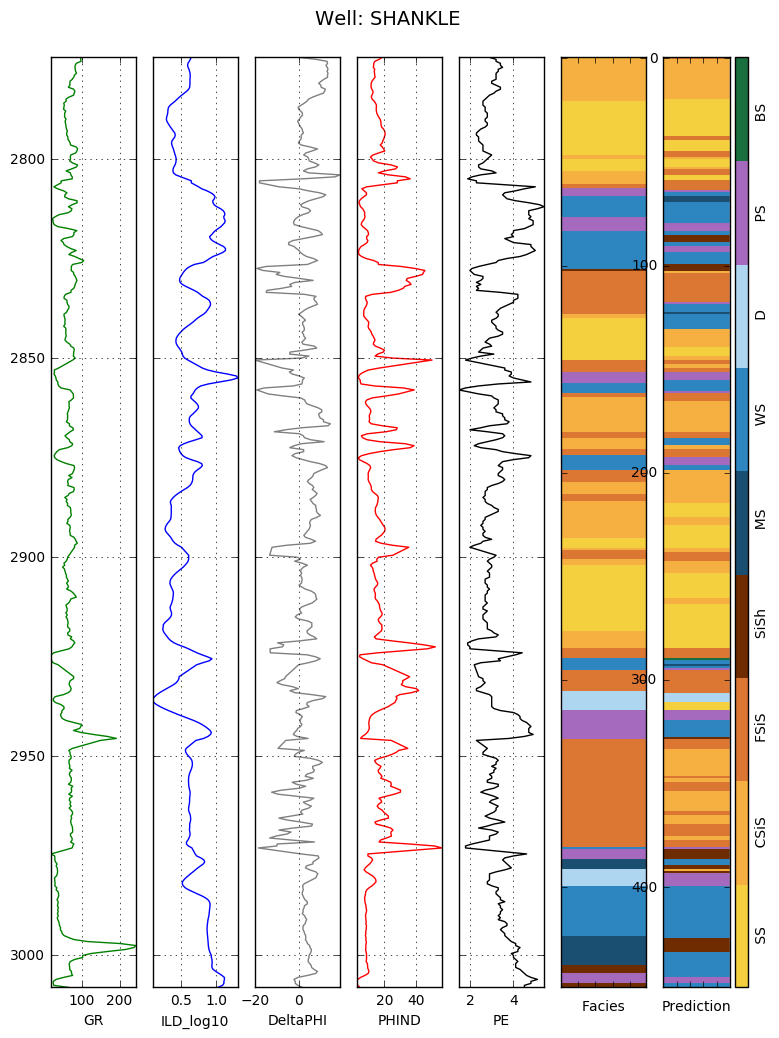

In [53]:
test_well['Prediction'] = prediction_GNB

compare_facies_plot(test_well, 'Prediction', facies_colors)

### Another method to write an accuracy

In [42]:
def accuracy(cm):
    total_correct = 0.
    nb_classes = cm.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += cm[i][i]
    acc = total_correct/sum(sum(cm))
    return acc

In [41]:
adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])

def accuracy_adjacent(cm, adjacent_facies):
    nb_classes = cm.shape[0]
    total_correct = 0.
    for i in np.arange(0,nb_classes):
        total_correct += cm[i][i]
        for j in adjacent_facies[i]:
            total_correct += cm[i][j]
    return total_correct / sum(sum(cm))

In [43]:
print('Facies classification accuracy = %f' % accuracy(cm))
print('Adjacent facies classification accuracy = %f' % accuracy_adjacent(cm, adjacent_facies))

Facies classification accuracy = 0.556793
Adjacent facies classification accuracy = 0.893096


#### Modeled in cooperation with Ievgen Ustenko
Github: https://github.com/iUstenko |
LinkedIn: https://goo.gl/gfRoSc